# Diffusers를 이용해 스테이블 디퓨전 AI 이미지 생성해보기
---
이제는 많은 분들이 익숙해진 AI 그림을 만들어 보려 합니다. AI 생성 이미지는 그동안 개인의 기술에 의존하는 작업이기 때문에 인건비가 많이 들어가는 예술, 디자인 영역을 빠르게 대체하고 있는 기술인데요, 이쪽 업계에서는 이제 생성형 AI의 대명사가 된 스테이블 디퓨전(Stable Diffusion)을 활용해 내가 원하는 그림체로 그림을 그려 보도록 하겠습니다.
<p></p></br>

## Stable Diffusion
---
스테이블 디퓨전은 <a href="https://stability.ai/">stability.ai</a>에서 제작한 생성형 AI 모델입니다. 오픈소스 프로젝트이기 때문에 다른 이미지 생성 모델에 비해서 접근성이 뛰어나고, 내 입맛에 맞게 파인튜닝(fine-tuning)을 하기 쉽다는 장점이 있습니다. 이번에는 <a href="https://huggingface.co/">허깅페이스(🤗HuggingFace)</a>에서 다운로드할 수 있는 <a href="https://huggingface.co/runwayml/stable-diffusion-v1-5">stable-diffusion-v1.5</a> 모델을 이용해 볼거예요.
<p></p></br>

## Diffusers
<a href="https://huggingface.co/docs/diffusers/ko/index">디퓨저(🧨Diffusers)</a>는 허깅페이스에서 제공하는 diffusion 모델 라이브러리입니다. 스테이블 디퓨전을 이용하는 방법은 크게 WebUI라고 하는 GUI 인터페이스와, 파이썬(Python) 프로그래밍 코드를 입력해 사용하는 CLI 방식이 있는데요, 이 중 후자를 손쉽게 구현할 수 있게 해 주는 라이브러리죠. 파이썬 기초 문법 정도만 알고 있다면 손쉽게 AI 이미지를 만들 수 있을 정도로 추상화 수준이 높습니다. 물론, 세밀한 옵션 조정도 지원하지요.
<p></p></br>

스테이블 디퓨전을 이용하기 위해서는 <a href="https://pytorch.org/get-started/locally/">파이토치(PyTorch)를 함께 설치</a>해야 합니다. 디퓨저 공식 문서의 설치 페이지를 참조해서 개발 환경을 세팅해 주세요. 다음에는 아래 코드를 차례대로 입력하면 내가 원하는 그림을 무한정 생성할 수 있답니다. 물론, 로컬 환경에서 실행하는 것이기 때문에 높은 컴퓨터 성능이 필요해요. 가능하면 VRAM이 많은 NVIDIA 그래픽카드를 이용하는 것을 추천드립니다.
<p></p></br>


In [1]:
# Import Package
from diffusers import DiffusionPipeline
import torch

<p></p></br>

### DiffusionPipeline
---
이제 디퓨저에서 스테이블 디퓨전 모델을 불러오기 위해 `DiffusionPipeline.from_pretrained` 함수를 이용할겁니다. 그런데, 해당 함수는 모델 선택 이외에도 `torch_dtype` 이라는 매개변수를 지정할 수 있는데요, 여기서는 흔히 `torch.float16`, `torch.float32` 등을 이용합니다. 이는 부동 소수점의 정밀도를 선택하는 것인데요, 단순한 자료형을 사용할수록 품질이 떨어지지만 속도는 올라가는 것으로 알려져 있습니다. 다만, `torch.float16` 의 경우 CPU 환경을 지원하지 않고, 추가 훈련이 불가능하기 때문에 CPU를 사용하거나 추가 훈련이 필요하다면 `torch.float32` 를 이용해 주는 것이 좋습니다.
<p></p></br>

다음으로는 그래픽 가속이 필요한 경우 장비를 선택해 줘야 합니다. `DiffusionPipeline.to` 함수를 이용해서 원하는 장비를 선택할 수 있는데요, cpu, cuda, mps 등을 선택할 수 있지요. 여기서 mps는 Apple Silicon을 이용한 맥에서 사용할 수 있는 옵션입니다. 그런데, mps 환경에서는 배치 실행이 불가능하다는 보고가 있으니 만약 애플 실리콘 환경에서 디퓨저를 구동하는 분들이라면 주의해 주세요.
<p></p></br>

만약 컴퓨터가 메모리가 적은 편이라면, `DiffusionPipeline.enable_attention_slicing` 함수를 실행하는 것이 좋다고 합니다. 주로 64GB 이하의 RAM이거나, 512*512px 이상의 해상도 작업을 할 때 추천한다고 하네요. 저용량 RAM에서 ~20% 정도의 성능 향상 보고가 있습니다. 이 함수는 메모리 스왑을 방지하고, 여러 단계로 나누어 실행하는 효과가 있다고 합니다.
<p></p></br>


In [19]:
pipeline = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float32
)


pipeline.to("cpu")


pipeline.enable_attention_slicing()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


<p></p></br>

### 이미지 생성
---
마지막으로는, 원하는 프롬프트를 입력해서 스테이블 디퓨전 이미지 생성 기능을 이용하면 됩니다. 생성된 이미지는 리스트 안에 들어간 형태로 반환되기 때문에, 이미지를 한 장만 생성한다면 해당 리스트를 인덱싱해 주세요. 그리고, 마음에 드는 이미지라면 `save` 함수를 이용해 저장해 주시면 됩니다.
<p></p></br>


In [20]:
images = pipeline("Squirrel in 1950s American cartoon style").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

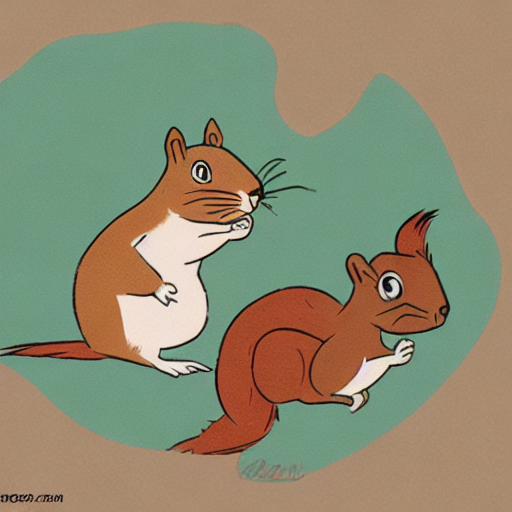

In [21]:
images

In [ ]:
images.save("test.png")